In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import math

# Hamming weights of numbers 0-15
HW = [0,1,1,2,1,2,2,3,1,2,2,3,2,3,3,4]

##PRESENT Sbox
S = [12,5,6,11,9,0,10,13,3,14,15,8,4,7,1,2]
correct_key = 9

In [2]:
#save data to file for tikz plot
def savetofile(filename,array):
    f = open(filename+".txt", "w")
    f.write("x y\n")
    i = 0
    for i in range(len(array)):
        f.write(str(i)+" "+str(array[i])+"\n")
        i+=1
    f.close()

In [3]:
def highest_tree_points(array):
    array_abs = [abs(a) for a in array]
    ind = np.argpartition(array_abs, -3)[-3:]
    print(ind)
    array_abs = np.array(array_abs)
    print(array_abs[ind])
    return

# Compute lookup tables

In [4]:
##compute T1
def getT1(T2):
    T1 = [0 for i in range(256)]
    for v in range(16):
        for m_in in range(16):
            table_input = ((v^m_in) << 4)^m_in
            T1[table_input] = S[v]^T2[m_in]
    return T1

In [5]:
##T2
T2 = [14,4,15,9,0,3,13,5,7,8,10,2,11,1,6,12]

In [6]:
print(getT1(T2))

[2, 1, 9, 2, 9, 3, 7, 8, 4, 6, 5, 10, 15, 6, 7, 14, 11, 8, 4, 15, 0, 10, 0, 15, 9, 11, 2, 13, 12, 5, 4, 13, 8, 15, 3, 12, 10, 14, 4, 5, 8, 0, 9, 12, 10, 3, 2, 11, 5, 2, 10, 5, 13, 9, 13, 12, 15, 7, 4, 1, 9, 0, 1, 8, 7, 4, 5, 4, 12, 6, 11, 14, 3, 15, 11, 0, 8, 15, 9, 4, 14, 13, 2, 3, 5, 15, 6, 3, 0, 12, 8, 3, 5, 2, 14, 3, 4, 9, 6, 9, 6, 8, 1, 0, 6, 10, 14, 5, 4, 9, 5, 2, 3, 14, 15, 0, 11, 5, 8, 9, 5, 9, 13, 6, 3, 14, 8, 15, 13, 10, 0, 1, 4, 4, 12, 7, 11, 13, 12, 9, 2, 1, 12, 1, 0, 7, 7, 6, 7, 7, 15, 4, 2, 4, 1, 4, 11, 8, 11, 6, 1, 12, 12, 7, 1, 1, 9, 2, 1, 3, 6, 7, 1, 12, 15, 12, 6, 11, 1, 10, 2, 2, 10, 1, 12, 14, 15, 14, 6, 11, 6, 5, 10, 3, 14, 11, 3, 13, 2, 13, 14, 8, 0, 15, 7, 4, 0, 7, 9, 0, 13, 8, 14, 0, 5, 10, 7, 1, 7, 8, 14, 13, 13, 10, 15, 6, 11, 14, 15, 11, 14, 11, 13, 5, 3, 2, 13, 10, 10, 9, 12, 5, 8, 13, 8, 12, 3, 6, 10, 2, 10, 11, 0, 7, 3, 0]


# Compute TVLA

In [7]:
#Load data from masked fixed dataset A
file_no_fixed = 100
traces_fixed = []
plaintexts_fixed = []

for i in range(file_no_fixed):
    with open('masked_fixed_dataset_A/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_fixed.append(lines)

with open('masked_fixed_dataset_A/plaintexts.txt') as f:
    plaintexts_fixed = f.read().splitlines()
    
trace_array_fixed = np.array(traces_fixed)
trace_array_fixed = trace_array_fixed.astype(float)
q = 5000 #number of time samples

In [8]:
#load data from masked fixed dataset B
file_no_fixed_2 = 100
traces_fixed_2 = []
plaintexts_fixed_2 = []

for i in range(file_no_fixed_2):
    with open('masked_fixed_dataset_B/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_fixed_2.append(lines)

with open('masked_fixed_dataset_B/plaintexts.txt') as f:
    plaintexts_fixed_2 = f.read().splitlines()
    
trace_array_fixed_2 = np.array(traces_fixed_2)
trace_array_fixed_2 = trace_array_fixed_2.astype(float)

In [9]:
def TVLA(number_of_traces,trace_array1,trace_array2,filename):
    #compute the t-value for all time samples
    ind = [i for i in range(number_of_traces)]
    trace_1 = trace_array1[ind]
    trace_2 = trace_array2[ind]
    #sample means for dataset one and dataset two at each time sample
    mean1 = trace_1.mean(axis=0)
    mean2 = trace_2.mean(axis=0)
    meandif = mean1 - mean2
    numerator = np.multiply(meandif,np.sqrt(number_of_traces))
    
    #variance for leakages at each time sample
    var1 = trace_1.var(axis=0)
    var2 = trace_2.var(axis=0)
    #sample variance for dataset one and dataset two at each time sample
    scale = number_of_traces/(number_of_traces-1)#sample variance divide by sample_size -1 instead of sample_size
    var1 = np.multiply(var1,scale)
    var2 = np.multiply(var2,scale)
    tvla = []
    for t in range(q):
        tvalue = numerator[t]/np.sqrt(var1[t]+var2[t])
        tvla.append(tvalue)
    savetofile(filename+str(number_of_traces),tvla)
    plt.plot(tvla)
    plt.show()
    print("highest three points")
    highest_tree_points(tvla)
    print("tvla at POI=392: " + str(tvla[392]))
    return

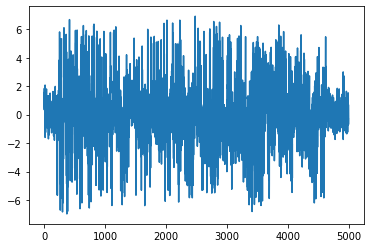

highest three points
[ 301 2481  373]
[6.83818211 6.91181046 6.97859639]
tvla at POI=392: -3.443578645858817


In [10]:
TVLA(50,trace_array_fixed,trace_array_fixed_2,"masked_tvlafixed_")

# Attack results

In [11]:
#Load data from attack traces
file_no_protected = 20000
traces_protected = []

for i in range(file_no_protected):
    with open('masked_random_plaintext_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_protected.append(lines)

with open('masked_random_plaintext_dataset/plaintext.txt') as f:
    plaintext_protected = f.read().splitlines()
    
trace_array_protected = np.array(traces_protected)
trace_array_protected = trace_array_protected.astype(float)

plaintext_array_protected = []
for i in range(file_no_protected):
    plaintext_array_protected.append(int(plaintext_protected[i][15],16))
    
plaintext_array_protected = np.array(plaintext_array_protected)
q = 5000 #number of time samples

In [14]:
#compute the correlation coefficients for all time samples given the leakage model
#0: identity leakage model
#1: Hamming weight leakage model
def corr_coeff(leakage_model):
    #store hypotheses of intermediate values
    iv = [[0 for x in range(file_no_protected)] for y in range(16)] 

    for i in range(16): #for each key hypothesis
        for j in range(file_no_protected): #for each plaintext
            pt = plaintext_array_protected[j] # get the target nibble of the plaintext
            iv[i][j] = S[i^pt] #compute the hypotheses of intermediate values
            if leakage_model == 1:
                iv[i][j] = HW[iv[i][j]]

    #store correlation coefficients for each time sample and each key hypothesis
    corr_coeff = [[0 for x in range(q)] for y in range(16)] 
    
    #for plotting
    x = []
    
    for t in range(q):
        for k in range(16): #for each key hypothesis
            #compute coefficient between the leakages at time sample t and the hypotheses
#             corr_coeff[k][t] = abs(np.corrcoef(trace_array[:,t],iv[k])[0][1])
            corr_coeff[k][t] = np.corrcoef(trace_array_protected[:,t],iv[k])[0][1]
        x.append(t)
    
    for k in range(16):
        if k == correct_key:
            plt.plot(x,corr_coeff[k],'b')
        else:
            plt.plot(x,corr_coeff[k],color="#808080")
        #printing the correlation coefficients
        print(max(corr_coeff[k]),k,corr_coeff[k].index(max(corr_coeff[k])))
    plt.show()
    return corr_coeff

0.22400378359422007 0 1945
0.5000478685110478 1 405
0.38085327719128503 2 1989
0.49470342978129994 3 1929
0.37031498740833185 4 1945
0.3122904952508555 5 213
0.5768556329168912 6 2024
0.1915627632750571 7 406
0.10115282400757888 8 2024
0.7002214010181786 9 1945
0.38894665867487 10 1945
0.31370958691535017 11 2024
0.39025533796336304 12 405
0.2077487487972224 13 213
0.397582736572667 14 1915
0.4951722385338682 15 2024


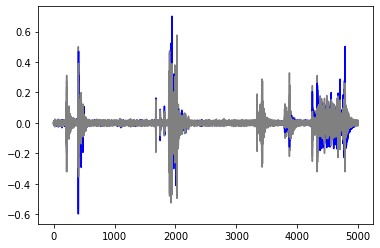

In [15]:
cor_protected = corr_coeff(0)
for i in range(16):
    savetofile("correlation_coefficients/corr_protected_" + str(i) + ".txt", cor_protected[i])

0.38895811692566 0 1945
0.46637960813752477 1 2024
0.2097917384357713 2 1989
0.4789195968375349 3 1929
0.43285579727865675 4 409
0.33301922138369405 5 405
0.5236126850873257 6 2024
0.24208637346216333 7 1945
0.4458365456738841 8 2024
0.5086641393094928 9 1929
0.36677279307552535 10 409
0.3391306495386736 11 405
0.5201713722507955 12 405
0.21383643330810181 13 213
0.15874790952945278 14 1915
0.6350883365410648 15 2005


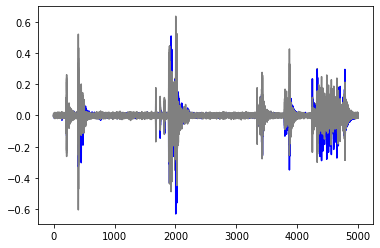

In [16]:
cor_hw_protected = corr_coeff(1)
for i in range(16):
    savetofile("correlation_coefficients/corr_hw_protected_" + str(i) + ".txt", cor_hw_protected[i])

# Profiling

In [17]:
#Traces for profiling
file_no_rk = 10000
traces_rk = []
plaintexts_rk = []
keys_rk = []

for i in range(file_no_rk):
    with open('masked_random_dataset/trace_'+str(i)+'.txt') as f:
        lines = f.read().splitlines()
        traces_rk.append(lines)

with open('masked_random_dataset/plaintext.txt') as f:
    plaintexts_rk = f.read().splitlines()

with open('masked_random_dataset/keys.txt') as f:
    keys_rk = f.read().splitlines()

trace_array_rk = np.array(traces_rk)
trace_array_rk = trace_array_rk.astype(float)

#extract the plaintext nibble
plaintext_array_rk = []
for i in range(file_no_rk):
    plaintext_array_rk.append(int(plaintexts_rk[i][15],16))
plaintext_array_rk = np.array(plaintext_array_rk)


#extract the key nibble
keys_array_rk = []
for i in range(file_no_rk):
    keys_array_rk.append(int(keys_rk[i][15],16))
keys_array_rk = np.array(keys_array_rk)


#number of time samples in one trace
N_rk = 5000

In [18]:
##get the target intermediate value for each trace in masked_random_dataset
target_value = []
for i in range(file_no_rk):
    v = S[plaintext_array_rk[i]^keys_array_rk[i]]
    target_value.append(v)
target_value = np.array(target_value)

In [19]:
#Function for computing SNR, given time sample t
#signal correspond to the exact value of the 0th Sbox output
#ifprint = 1, intermedaite values of the computation will be printed
def computeSNR(t, ifprint):
    no_of_sets = 16
    
    #no_of_sets sets
    A = [[] for y in range(no_of_sets)] 
    
    #for each trace/plaintext
    for j in range(file_no_rk):
        
        pt = int(plaintexts_rk[j][15],16)#extract the 0th nibble of the plaintext
        ky = int(keys_rk[j][15],16)#extract the 0th nibble of the first round key
        
        v = S[ky^pt]#compute the output of the 0th Sbox for this plaintext
        
        A[v].append(trace_array_rk[j][t])#group the leakage at time t according to this output
    
    #compute the averages for leakages in each set
    avg = []
    for v in range(no_of_sets):
        avg.append(statistics.mean(A[v]))
        if ifprint:
            print("average of A[" + str(v) + "] is %s" %(statistics.mean(A[v])))
    
    #variance of signal is given by the variance of leakage avgs
    varX = np.var(avg)
    
    #take leakage minus mean
    LminusAvg = []
    for v in range(no_of_sets):
        for j in range(len(A[v])):
            LminusAvg.append(A[v][j]-avg[v])
    #variance of noise is given by variance of leakage minus mean
    varN = np.var(LminusAvg)
    
    #SNR is given by variance of signal divided by variance of noise
    snr = varX/varN
    
    if ifprint:
        print("\nVariance of the signal is % s " %(varX))
        print("Variance of the noise is % s " %(varN))
        print("SNR is % s " %(snr))
    return varX, varN, snr

In [20]:
def SNR_for_all_time_samples():
    varX = [0 for i in range(N_rk)]
    varN = [0 for i in range(N_rk)]
    SNR = [0 for i in range(N_rk)]
    for i in range(N_rk):
        varX[i], varN[i],SNR[i]=computeSNR(i,0)
    #save the data to files
    savetofile("varX",varX)
    savetofile("varN",varN)
    savetofile("SNR_masked",SNR)
    
    #plot of SNR
    plt.plot(SNR)
    
    #three POIs
    print("three highest poits: ")
    print(highest_tree_points(SNR))
    return

three highest poits: 
[ 405 1929 2024]
[3.6679396  4.25377484 3.9400505 ]
None


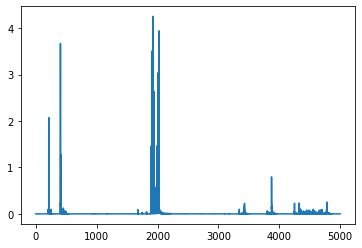

In [21]:
SNR_for_all_time_samples()

In [22]:
POI = 1929

In [23]:
#build template on POI
def build_template(leakage_model, no_of_traces, inputs, traces):
    
    if leakage_model == 0:
        no_of_sets = 16 #for signal = identity, we group leakages into 16 sets
    elif leakage_model == 1:
        no_of_sets = 5 #for signal = hamming weight, we group leakages into 5 sets
        
    #record leakages at the POI for traces in each set
    poi_leakage = [[] for x in range(no_of_sets)] 
    #separate leakages to sets depending on the Sbox output value and leakage model
    for j in range(no_of_traces): #for each value
        iv = inputs[j] #the target intermediate value
        if leakage_model == 1:
            iv = HW[iv]
        poi_leakage[iv].append(traces[j,POI])
    
    #mean vectors
    mean_vector = []
    #variances
    variances = []
    for i in range(no_of_sets):
        mean_vector.append(statistics.mean(poi_leakage[i]))
        variances.append(np.var(poi_leakage[i]))
    
    #return mean vector and the covariance matrix
    return mean_vector,variances

In [24]:
##templates for identity leakage model
mean_vector_id, variances_id = build_template(0, file_no_rk, target_value, trace_array_rk)
print(mean_vector_id)
print(variances_id)

[-0.04462599342621664, -0.04414851028726708, -0.04442735373402556, -0.044014300431711145, -0.03992798430094787, -0.03977126949917898, -0.03976680871212121, -0.03958930907809984, -0.04437107475688817, -0.04396701388888889, -0.044192644505718956, -0.04373693769904458, -0.03958032693073248, -0.039483642578125, -0.03947192342985318, -0.03931544569672131]
[1.3571883412845424e-06, 1.1582078584563808e-06, 1.3139292697092501e-06, 1.2962500545357238e-06, 1.2833329008507453e-06, 1.1575715365912517e-06, 1.365059116107811e-06, 1.2382154324183431e-06, 1.093898803745889e-06, 1.1423080169011157e-06, 1.2898654938558931e-06, 1.2747157809265131e-06, 1.2367776385320503e-06, 1.1607632040977477e-06, 1.3398935196837603e-06, 1.1304564707960308e-06]


In [25]:
for i in range(16):
    print("%.5f, " % mean_vector_id[i], end="")

-0.04463, -0.04415, -0.04443, -0.04401, -0.03993, -0.03977, -0.03977, -0.03959, -0.04437, -0.04397, -0.04419, -0.04374, -0.03958, -0.03948, -0.03947, -0.03932, 

In [26]:
##templates for hamming weight leakage model
mean_vector_hw, variances_hw = build_template(0, file_no_rk, target_value, trace_array_rk)

In [27]:
#Attack with attack traces
#compute the score of each key hypothesis given the set of traces, the corresponding inpputs (plaintext nibble) and the templates
#mean_vector and variances contain the templates
def template_prob_score(leakage_model, no_of_traces, traces, mean_vector, variances, pts):
    
    if leakage_model == 0:
        no_of_sets = 16 #for signal = identity, we group leakages into 16 sets
    elif leakage_model == 1:
        no_of_sets = 5 #for signal = hamming weight, we group leakages into 5 sets
    
    prob = [0 for x in range(16)]#score for each key hypothesis
    
    #group the traces according to the key hypothesis
    for k in range(16): #for each key hypothesis
        #compute score of each trace
        for j in range(no_of_traces): #for each trace
            pt = pts[j] # get the target nibble of the plaintext
            iv = S[k^pt] #compute the intermediate value
            if leakage_model == 1:
                iv = HW[iv]
            #leakges at the POI
            trace_leakage = traces[j,POI]
#             trace_leakage = traces[j]
            #compute the score of this trace using the template
            mean_dif = trace_leakage-mean_vector[iv]
            trace_prob = math.log(variances[iv])+(mean_dif*mean_dif)/variances[iv]
            #probablity for each key hypothesis is update with each trace
            prob[k] -= trace_prob
    return prob

def compute_rank(probs, key):
    prob_sorted = []
    for k in range(16):
        prob_sorted.append(probs[k])
    prob_correct = prob_sorted[key]
    prob_sorted.sort()
    rank = prob_sorted.index(prob_correct)
    return 16-rank #the key with the lowest score is the best

In [28]:
#compute probability scores for each key hypothesis
#mean and variances are the templates
def prob_score(leakage_model, key_nibble, max_no_trace, mean_vector, variances, all_traces, all_inputs):
    #probability score for all key hypotheses
    all_prob_score = [[0 for x in range(max_no_trace+1)] for y in range(16)]
    for no_of_traces in range(1,max_no_trace+1):
        ind = [i for i in range(no_of_traces)]
        traces = all_traces[ind]
        pts = all_inputs[ind]
        probs = template_prob_score(leakage_model, no_of_traces, traces, mean_vector, variances, pts)
        for k in range(16):
            all_prob_score[k][no_of_traces] = probs[k]
    
    #plot probability scores
    x = []
    for no_of_traces in range(max_no_trace+1):
        x.append(no_of_traces)
    for k in range(16):
        if k == correct_key:
            plt.plot(x,all_prob_score[k],'b')
        else:
            plt.plot(x,all_prob_score[k],color="#808080")
    plt.title('Probability scores')
    plt.show()
    
    return all_prob_score

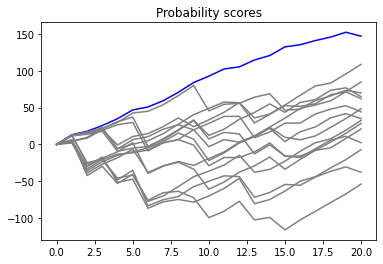

In [29]:
prob_score(0, correct_key, 20, mean_vector_id, variances_id, trace_array_protected, plaintext_array_protected);

In [30]:
#indices of traces/plaintexts used for computing success rate and guessing entropy
#generate random indices for traces in the attack set
no_of_attack = 100#number of attacks to do for computing GE
max_trace = int(file_no_protected/no_of_attack) #maximum number of traces to consider
indall = [[] for i in range(max_trace+1)]
def set_up_indices():
    for no_of_traces in range(max_trace+1):
        indall[no_of_traces] = random.sample(range(file_no_protected), no_of_traces*no_of_attack)
    return
set_up_indices()

In [31]:
#Computing success rate and guessing entropy given the number of traces
def sr_ge_dpa(mean_vector, variances, no_of_traces, leakage_model, key_nibble, all_traces, all_plaintext):
    ranks = []#store key rank in each simulated attack
    success_rate = 0
    
    for i in range(no_of_attack):#repeat no_of_attack attacks
        ind = indall[no_of_traces][i*no_of_traces:(i+1)*no_of_traces]
        traces = all_traces[ind]#leakges at POIs
        pts = all_plaintext[ind]#corresponding plaintext nibbles
        rk = compute_rank(template_prob_score(leakage_model, no_of_traces, traces, mean_vector, variances, pts),key_nibble)
        ranks.append(rk)
        if(rk == 1):
            success_rate += 1
    success_rate = success_rate/no_of_attack
    return success_rate, statistics.mean(ranks)

In [32]:
#compute sucess rate and guessing entropy for different number of traces
def get_SR_GE(key_nibble):
    SR_id = [0,0]
    GE_id = [0,0]
    SR_hw = [0,0]
    GE_hw = [0,0]
    
    for no_of_traces in range(2,max_trace+1):
        if no_of_traces%100 == 0:
            print('computing for number of traces ' + str(no_of_traces))
        #signal = v, original
        sr_id,ge_id = sr_ge_dpa(mean_vector_id, variances_id, no_of_traces, 0, key_nibble, trace_array_protected, plaintext_array_protected)
        SR_id.append(sr_id)
        GE_id.append(ge_id)
        #signal = Hamming weight 
        sr_hw,ge_hw = sr_ge_dpa(mean_vector_hw, variances_hw, no_of_traces, 1, key_nibble, trace_array_protected, plaintext_array_protected)
        SR_hw.append(sr_hw)
        GE_hw.append(ge_hw)
        

    
    # Placing the plots in the plane
    plt.figure(figsize=(10,6)) 
    
    ##plot success rates
    ax1 = plt.subplot(3, 1, 1)
    plt.plot(SR_id, 'b')
    plt.plot(SR_hw, 'g')
        
    ##plot guessing entropy
    ax2 = plt.subplot(3, 1, 2)
    plt.plot(GE_id, 'b')
    plt.plot(GE_hw, 'g')
   
    ax1.set_title("SR")
    ax2.set_title("GE")
    
    
    ##save to file
    savetofile("SR_masked",SR_id)
    savetofile("SR_hw",SR_hw)
    savetofile("GE_masked",GE_id)
    savetofile("GE_hw",GE_hw)
    
    
    return

computing for number of traces 100
computing for number of traces 200


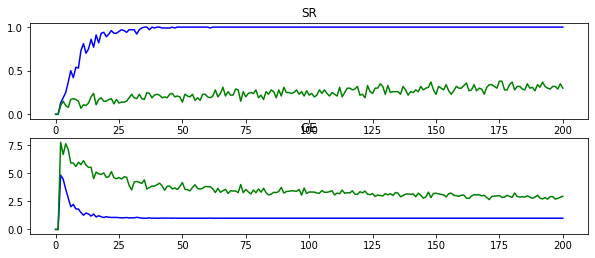

In [33]:
get_SR_GE(correct_key)